In [ ]:
import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm
import torch
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

In [2]:
import pickle

import matplotlib.pyplot as plt



data = pickle.load(open("mid_animal_data_pub (2).pkl", "rb"))


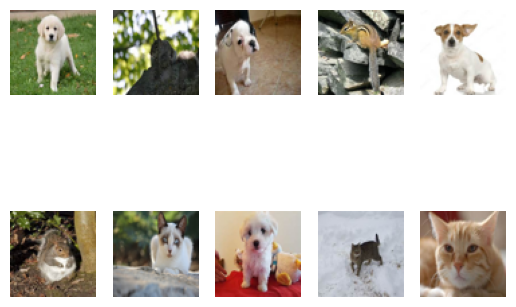

In [36]:
# 문제 1. 데이터 불러오고 출력해보기 #

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(data['test1_images'][i])
    plt.axis('off')

In [37]:
# 문제 2. 유사도 계산하기 #
 
import numpy as np
from numpy.linalg import norm


def cos_sim(A, B):
    return np.dot(A, B) / (norm(A) * norm(B))

ans = cos_sim(data['train_vectors'][0], data['test1_vectors'][1])
#print(ans)
print(data['train_vectors'][0])

# 모듈로 불러오기
from sklearn.metrics.pairwise import jaccard_similarity
jaccard_similarity

# cosine_similarity(data['train_vectors'][0].reshape(1, -1), data['test1_vectors'][1].reshape(1, -1))

[  6.765437     2.335988     2.2718782   -1.3182168  -11.782342
 -10.718826    -1.3735901   -8.469524   -11.367855    -8.421956
  -2.0886571   -3.8141303    7.776192    -5.2156706   -4.444244
 -10.955561    -6.44593     27.332575     3.7986956   12.299448
   3.7366812   -5.354538   -15.770173   -10.684034     7.0357723
   0.90330577 -17.27041     18.821602    -0.21262008  10.847136
 -15.059359     1.5996732  -12.116945    -6.3760934  -15.43216
  -1.3995752   -6.586234     2.240013     0.6041941    3.5100632
  12.447158    13.748887     4.3906603   15.164971    -4.8332644
  -5.258499    -1.3006055   -7.4210243    0.19281198   8.1676035
  14.436357    -6.1549673   -2.9240303    2.051413   -23.035912
  16.355001    18.320375    -4.820858     8.906447   -15.599469
  -2.4181466    4.772444    -2.0793827   -2.4883003   -6.974465
   5.772887    -5.003234   -16.463768     4.7701225    4.2580595
   2.560722    10.263502     0.27582383  -7.952553     1.8789194
  -3.5311117  -19.777473   -13.5161

ImportError: cannot import name 'jacard_simil' from 'sklearn.metrics.pairwise' (c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\pairwise.py)

In [5]:
# 문제 3. 유사한 이미지 찾기 #

index_list = []
sum = 0
for i in range(len(data['test1_vectors'])):
    list_ = []
    for j in range(len(data['train_vectors'])):
        res = cos_sim(data['test1_vectors'][i], data['train_vectors'][j])
        #res = float(res)
        list_.append((res, j))
    
    
    list_.sort(reverse=True)
    
    for p, q in list_[:3]:
        sum += q
        index_list.append(q)

        
        
print(index_list)
print(sum)


[346, 442, 158, 463, 97, 70, 240, 699, 480, 571, 977, 338, 593, 282, 584, 498, 835, 37, 736, 324, 918, 127, 382, 959, 7, 991, 141, 447, 847, 501]
14090


In [6]:
# 문제 3. 유사한 이미지 찾기 #

index_list = []
sum = 0
for i in range(len(data['test1_vectors'])):
    list_ = []
    for j in range(len(data['train_vectors'])):
        res = cos_sim(data['test1_vectors'][i], data['train_vectors'][j])
        # res = float(res)
        list_.append(res)
        
    
    list_copied = list_ [:]       
    list_copied.sort(reverse=True)
     
    for p in range(len(data['test1_vectors'])):
        for q in range(len(data['train_vectors'])):
    
            if list_copied[0] == cos_sim(data['test1_vectors'][p], data['train_vectors'][q]):
                index_list.append(q)
                sum += q                
            elif list_copied[1] == cos_sim(data['test1_vectors'][p], data['train_vectors'][q]):
                index_list.append(q)
                sum += q
            elif list_copied[2] == cos_sim(data['test1_vectors'][p], data['train_vectors'][q]):
                index_list.append(q)
                sum += q

print(sum)
print(index_list)

14090
[158, 346, 442, 70, 97, 463, 240, 480, 699, 338, 571, 977, 282, 584, 593, 37, 498, 835, 324, 736, 918, 127, 382, 959, 7, 141, 991, 447, 501, 847]


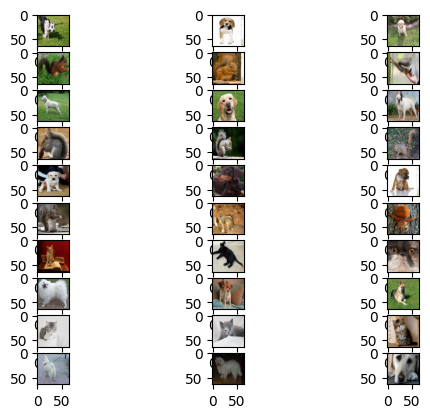

In [7]:
for i in range(len(index_list)):
    plt.subplot(10, 3, i + 1)
    plt.imshow(data['train_images'][index_list[i]])


In [16]:
# 문제 5. Softmax Regression 구현 #         
            
            
import torch
import torch.nn.functional as F
import torch.nn as nn

x_train = torch.from_numpy(data["train_vectors"])
y_train = torch.from_numpy(data["train_labels"])

model = nn.Linear(256, 3)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


for epoch in range(10001):

    z = model(x_train)
    cost = F.cross_entropy(z, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    with torch.no_grad():
        if epoch % 1000 == 0:
            print(f"epoch: {epoch}, cost: {cost.item()}")



epoch: 0, cost: 0.6725385189056396
epoch: 1000, cost: 4.054084638482891e-05
epoch: 2000, cost: 2.785230753943324e-05
epoch: 3000, cost: 1.8905186152551323e-05
epoch: 4000, cost: 1.237176820723107e-05
epoch: 5000, cost: 7.942196134536061e-06
epoch: 6000, cost: 5.065675850346452e-06
epoch: 7000, cost: 3.220813141524559e-06
epoch: 8000, cost: 2.0348227280919673e-06
epoch: 9000, cost: 1.273851466976339e-06
epoch: 10000, cost: 7.901409730948217e-07


In [35]:

import numpy as np
from sklearn.linear_model import LogisticRegression

x_test = torch.from_numpy(data["test2_vectors"])
z = model(x_test)
print(torch.argmax(z, dim=1)) 

#print("".join([str(x) for x in torch.argmax(z, dim=1).tolist()]))
    
'''
from sklearn.linear_model import LogisticRegression
 
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

pred = logistic.predict(data['test2_vectors'])
print(pred)
'''

tensor([2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0,
        1, 1, 1, 1, 2, 2])


"\nfrom sklearn.linear_model import LogisticRegression\n \nlogistic = LogisticRegression()\nlogistic.fit(x_train, y_train)\n\npred = logistic.predict(data['test2_vectors'])\nprint(pred)\n"